In [15]:
import pandas as pd

# API data link
#url = "https://data.cityofchicago.org/resource/85ca-t3if.csv"
url = "https://data.cityofchicago.org/resource/85ca-t3if.csv?$limit=3000"
df = pd.read_csv(url)

print(df.info())

# View the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id                3000 non-null   object 
 1   crash_date_est_i               161 non-null    object 
 2   crash_date                     3000 non-null   object 
 3   posted_speed_limit             3000 non-null   int64  
 4   traffic_control_device         3000 non-null   object 
 5   device_condition               3000 non-null   object 
 6   weather_condition              3000 non-null   object 
 7   lighting_condition             3000 non-null   object 
 8   first_crash_type               3000 non-null   object 
 9   trafficway_type                3000 non-null   object 
 10  lane_cnt                       0 non-null      float64
 11  alignment                      3000 non-null   object 
 12  roadway_surface_cond           3000 non-null   o

,crash_record_id,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,...,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,0b67107213b27694371c3aceabc80ac9a7cfee9d14dc3c...,NaN,2025-03-07T00:24:00.000,40,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,6.0,0.0,0,6,3,41.825883,-87.600972,POINT (-87.600971854237 41.825882585011)
1,d6a8d74f8c8de3f7fc77de83a16951947a4de96d55c91a...,NaN,2025-03-06T22:48:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,22,5,3,41.984172,-87.713644,POINT (-87.713643612139 41.984171638665)
2,c14f9f63441656e78bd971512c011b7a63b665c734e9e4...,NaN,2025-03-06T22:26:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,22,5,3,41.802054,-87.654927,POINT (-87.65492729077 41.802053540161)
3,7a7bdc920b533b4696fb7a546e6463f3d9a14ef3558963...,NaN,2025-03-06T21:47:00.000,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,21,5,3,41.924754,-87.765872,POINT (-87.765871628095 41.924754177024)
4,6a7a8b60c68e7e99912befad78cd7257210675525db9e4...,NaN,2025-03-06T20:20:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,1.0,2.0,0.0,20,5,3,41.850411,-87.679812,POINT (-87.679812195231 41.850410991304)


In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values statistics:")
print(missing_values[missing_values > 0])

# Drop columns with excessive missing values (threshold can be set, e.g., 50%)
threshold = 0.5

df_cleaned = df.dropna(thresh=len(df) * threshold, axis=1).copy()
# Fill missing values for certain key fields
df_cleaned["weather_condition"].fillna("Unknown", inplace=True)

# Drop rows that still have missing values (if only a few remain)
df_cleaned.dropna(inplace=True)

print(df_cleaned.isnull().sum())

print(df_cleaned.dtypes)

Missing values statistics:
crash_date_est_i                 2839
lane_cnt                         3000
report_type                        90
intersection_related_i           2260
private_property_i               2888
hit_and_run_i                    2040
photos_taken_i                   2945
statements_taken_i               2922
dooring_i                        2995
work_zone_i                      2996
work_zone_type                   2996
workers_present_i                3000
most_severe_injury                  3
injuries_total                      3
injuries_fatal                      3
injuries_incapacitating             3
injuries_non_incapacitating         3
injuries_reported_not_evident       3
injuries_no_indication              3
injuries_unknown                    3
latitude                           37
longitude                          37
location                           37
dtype: int64
crash_record_id                  0
crash_date                       0
posted_speed_lim

C:\Users\Yiyi Wu\AppData\Local\Temp\ipykernel_25492\3311351996.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["weather_condition"].fillna("Unknown", inplace=True)


In [16]:
# Convert date-time format
df_cleaned["crash_date"] = pd.to_datetime(df_cleaned["crash_date"])

df_cleaned["speed_limit"] = pd.to_numeric(df_cleaned["posted_speed_limit"], errors='coerce')

df_cleaned.to_csv("chicago_accidents_cleaned.csv", index=False)
print("Data cleaning completed and saved!")


Data cleaning completed and saved!


In [5]:
from IPython.display import display

In [6]:

df_accidents = pd.read_csv('chicago_accidents_cleaned.csv')

# Load vehicle information data
df_vehicles = pd.read_csv('https://data.cityofchicago.org/resource/68nd-jvt3.csv?$query=SELECT%20crash_record_id%2C%20vehicle_id%2C%20make%2C%20model%2C%20first_contact_point')

# Load people information data
df_people = pd.read_csv('https://data.cityofchicago.org/resource/u6pd-qa9d.csv?$query=SELECT%20crash_record_id%2C%20vehicle_id%2C%20sex%2C%20age')


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_accidents.fillna(np.nan, inplace=True)
df_vehicles.fillna(np.nan, inplace=True)
df_people.fillna(np.nan, inplace=True)



,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,latitude,longitude,location,speed_limit,vehicle_id,make,model,first_contact_point,sex,age
551,99f05af3f41ce13ba4253c1a403e445975e3c508e209db...,2025-03-04 22:09:00,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,42.009977,-87.682107,POINT (-87.682107098313 42.009976978403),30,1921641.0,CHEVROLET,TRAX,FRONT-RIGHT-CORNER,F,None
552,99f05af3f41ce13ba4253c1a403e445975e3c508e209db...,2025-03-04 22:09:00,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,42.009977,-87.682107,POINT (-87.682107098313 42.009976978403),30,1921642.0,HYUNDAI,SONATA,SIDE-LEFT,NaN,NaN
553,99f05af3f41ce13ba4253c1a403e445975e3c508e209db...,2025-03-04 22:09:00,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,42.009977,-87.682107,POINT (-87.682107098313 42.009976978403),30,1921643.0,HONDA,CIVIC,REAR-LEFT-CORNER,NaN,NaN
554,99f05af3f41ce13ba4253c1a403e445975e3c508e209db...,2025-03-04 22:09:00,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,42.009977,-87.682107,POINT (-87.682107098313 42.009976978403),30,1921644.0,HONDA,CR-V,REAR-LEFT-CORNER,NaN,NaN


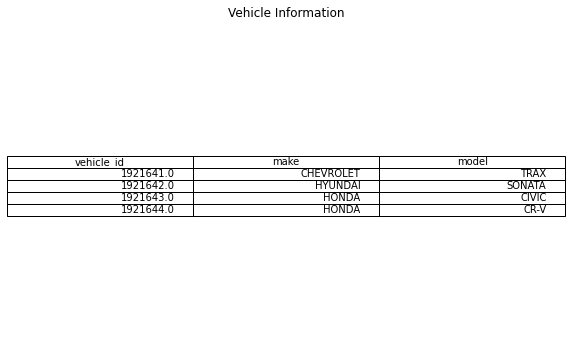

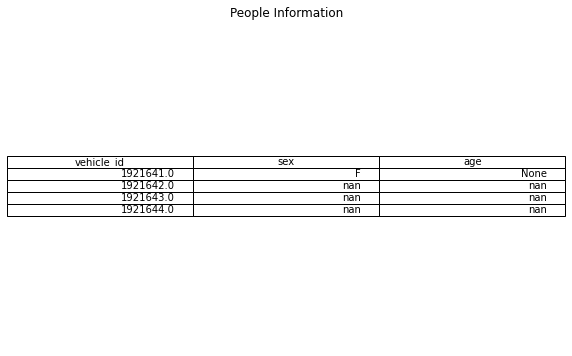

In [10]:
# Merge vehicle and people information with accident data
df_merged = pd.merge(df_accidents, df_vehicles, on='crash_record_id', how='left')
df_merged = pd.merge(df_merged, df_people, on=['crash_record_id', 'vehicle_id'], how='left')

def visualize_crash_info(crash_record_id):
    # Filter the corresponding accident record
    crash_data = df_merged[df_merged['crash_record_id'] == crash_record_id]

    if crash_data.empty:
        print(f'Cannot find Crash Record of {crash_record_id} ')
        return

    # Display detailed accident information
    display(crash_data)

    # Extract vehicle and people information
    vehicle_info = crash_data[['vehicle_id', 'make', 'model']].drop_duplicates()
    people_info = crash_data[['vehicle_id', 'sex', 'age']]

    # Visualize vehicle information
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=vehicle_info.values, colLabels=vehicle_info.columns, loc='center')
    plt.title('Vehicle Information')
    plt.show()

    # Visualize people information
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=people_info.values, colLabels=people_info.columns, loc='center')
    plt.title('People Information')
    plt.show()

visualize_crash_info('99f05af3f41ce13ba4253c1a403e445975e3c508e209dbd01eb2edcfe1cf35f2297ca025a3cfe1c197ef3faae1c0d26edb9f4834a556b404fd7584774c5dce04')


In [53]:
# Handle missing values
df_vehicles['first_contact_point'] = df_merged['first_contact_point'].fillna('UNKNOWN')

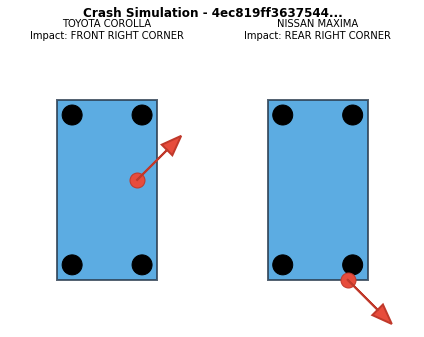

In [78]:
import re

def plot_crash_simulation(crash_record_id, df_merged):
    """ Draw a multi-vehicle crash simulation (with full details) """
    # Data preprocessing
    crash_data = df_merged[df_merged['crash_record_id'] == crash_record_id].copy()
    
    if crash_data.empty:
        print(f"Cannot find Crash Record {crash_record_id}")
        return
    
    crash_data = crash_data.drop_duplicates(subset=['vehicle_id'])
    # Standardize the first contact point field
    crash_data['first_contact_point'] = (
        crash_data['first_contact_point']
        .str.upper()
        .str.replace(r'[^A-Z]', ' ', regex=True)  # Replace non-alphabetic characters with spaces
        .str.replace(r'\s+', ' ', regex=True)     # Merge multiple spaces
        .str.strip()
    )
    
    # Clean vehicle make information
    crash_data['make'] = (
        crash_data['make']
        .str.replace(r'\(.*?\)', '', regex=True)  # Remove content inside parentheses
        .str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)  # Remove non-alphanumeric characters
        .str.strip()
        .fillna('UNKNOWN')
    )
    
    # Collision point configuration (supports multiple formats)
    collision_config = {
        "FRONT":             {"point": (0.5, 1.0),  "arrow": (0, 0.3)},
        "FRONT RIGHT CORNER":{"point": (0.8, 1.0),  "arrow": (0.3, 0.3)},
        "FRONT LEFT CORNER": {"point": (0.2, 1.0),  "arrow": (-0.3, 0.3)},
        "REAR":              {"point": (0.5, 0.0),  "arrow": (0, -0.3)},
        "REAR RIGHT CORNER": {"point": (0.8, 0.0),  "arrow": (0.3, -0.3)},
        "REAR LEFT CORNER":  {"point": (0.2, 0.0),  "arrow": (-0.3, -0.3)},
        "SIDE RIGHT":        {"point": (1.0, 0.5),  "arrow": (0.3, 0)},
        "SIDE LEFT":         {"point": (0.0, 0.5),  "arrow": (-0.3, 0)},
        "TOP":               {"point": (0.5, 1.5),  "arrow": (0, 0.5)},
        "UNDERCARRIAGE":     {"point": (0.5, 0.5),  "arrow": (0, 0)},
        "UNKNOWN":           {"point": (0.5, 0.5),  "arrow": (0, 0)}
    }

    # Create subplots
    num_vehicles = len(crash_data)
    fig, axes = plt.subplots(1, num_vehicles, figsize=(3*num_vehicles, 5))
    if num_vehicles == 1:  # Handle single vehicle case
        axes = [axes]

    for ax, (idx, row) in zip(axes, crash_data.iterrows()):
        # Get the standardized collision point configuration
        contact_point = row['first_contact_point']
        config = collision_config.get(contact_point, collision_config["UNKNOWN"])
        
        # Draw the vehicle body
        car = plt.Rectangle((0, 0), 1, 1.8, 
                          edgecolor="#2c3e50", facecolor="#3498db",
                          linewidth=2, alpha=0.8, zorder=2)
        ax.add_patch(car)
        
        # Draw tires
        for wheel_pos in [(0.15, 0.15), (0.85, 0.15), (0.15, 1.65), (0.85, 1.65)]:
            wheel = plt.Circle(wheel_pos, 0.1, color="black", zorder=3)
            ax.add_patch(wheel)
        
        # Draw collision point and impact direction arrow
        ax.plot(*config["point"], 'o', markersize=15, 
              markerfacecolor='#e74c3c', markeredgecolor='#c0392b', zorder=4)
        ax.arrow(config["point"][0], config["point"][1],
                *config["arrow"], 
                head_width=0.15, head_length=0.2,
                fc='#e74c3c', ec='#c0392b', 
                linewidth=2, zorder=5)
        
        # Add vehicle information
        make = row['make'][:15]  # Truncate overly long brand names
        model = str(row.get('model', '')).replace('nan', '')[:15]
        info = f"{make} {model}\nImpact: {contact_point}"
        ax.set_title(info, fontsize=10, pad=12)
        
        # Set plot range
        ax.set_xlim(-0.5, 1.5)
        ax.set_ylim(-0.5, 2.3)
        ax.set_aspect('equal')
        ax.axis('off')

    # Add global title
    plt.suptitle(f"Crash Simulation - {crash_record_id[:15]}...", 
               y=0.95, fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Example 
plot_crash_simulation('4ec819ff36375448f907eb903aa8ed748188fbdd2fa95b363adba7e2adf1c69cff374facbcb619cb9d536eb8a4f229ed81043b4551d78a61a9d4cd805a1c6e38', df_merged)

# plot_crash_simulation('63539a1b60636cdd14cd3da9d5f2185fc026b811a040ff5a855b80e6303e94b66b3526cda43a6f6dc13f1a8c91be41f8042496f96843b5d6e40fc12456f0c6b0', df_merged)


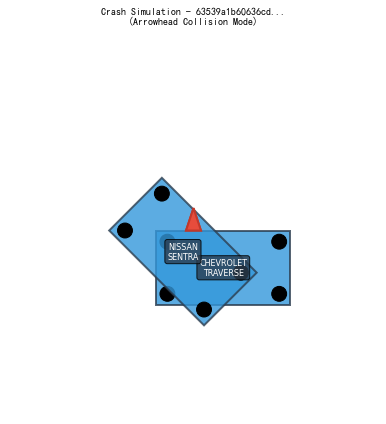

In [79]:
from matplotlib.transforms import Affine2D

def plot_crash_simulation(crash_record_id, df_merged):
    """ Draw a multi-vehicle crash simulation (collision arrowhead mode) """
    # Data preprocessing
    crash_data = df_merged[df_merged['crash_record_id'] == crash_record_id].copy()
    if crash_data.empty:
        print(f"Cannot find crash record {crash_record_id}")
        return
    
    crash_data = crash_data.drop_duplicates(subset=['vehicle_id'])
    crash_data['first_contact_point'] = (
        crash_data['first_contact_point']
        .str.upper()
        .str.replace(r'[^A-Z]', ' ', regex=True)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
    )
    crash_data['make'] = (
        crash_data['make']
        .str.replace(r'\(.*?\)', '', regex=True)
        .str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
        .str.strip()
        .fillna('UNKNOWN')
    )

    # Enhanced collision configuration (added reverse arrow parameters)
    collision_config = {
        "FRONT": {
            "point": (0.5, 1.0), 
            "arrow_vec": (0, 1.0),  # Original arrow direction
            "reverse_rotation": 0    # Reverse rotation angle
        },
        "FRONT RIGHT CORNER": {
            "point": (0.8, 1.0), 
            "arrow_vec": (0.5, 0.5),
            "reverse_rotation": 45
        },
        "FRONT LEFT CORNER": {
            "point": (0.2, 1.0), 
            "arrow_vec": (-0.5, 0.5),
            "reverse_rotation": -45
        },
        "REAR": {
            "point": (0.5, 0.0), 
            "arrow_vec": (0, -1.0),
            "reverse_rotation": 180
        },
        "REAR RIGHT CORNER": {
            "point": (0.8, 0.0), 
            "arrow_vec": (0.5, -0.5),
            "reverse_rotation": 135
        },
        "REAR LEFT CORNER": {
            "point": (0.2, 0.0), 
            "arrow_vec": (-0.5, -0.5),
            "reverse_rotation": -135
        },
        "SIDE RIGHT": {
            "point": (1.0, 0.5), 
            "arrow_vec": (1.0, 0),
            "reverse_rotation": 90
        },
        "SIDE LEFT": {
            "point": (0.0, 0.5), 
            "arrow_vec": (-1.0, 0),
            "reverse_rotation": -90
        }
    }

    fig, ax = plt.subplots(figsize=(10, 6))
    collision_center = (0, 0)  # Collision center point

    for idx, row in crash_data.iterrows():
        contact_point = row['first_contact_point']
        config = collision_config.get(contact_point, {
            "point": (0.5, 0.5), 
            "arrow_vec": (0, 0),
            "reverse_rotation": 0
        })

        # Determine vehicle rotation angle towards the collision center
        rotation_angle = config["reverse_rotation"]
        radian = np.deg2rad(rotation_angle)
        
        # Get local collision point coordinates
        local_px, local_py = config["point"]
        
        # Rotated collision point coordinates (before translation)
        rotated_px = local_px * np.cos(radian) - local_py * np.sin(radian)
        rotated_py = local_px * np.sin(radian) + local_py * np.cos(radian)
        
        # Compute translation needed to move the rotated collision point to the center
        translate_x = collision_center[0] - rotated_px
        translate_y = collision_center[1] - rotated_py

        transform = (
            Affine2D()
            .rotate_deg(rotation_angle)
            .translate(translate_x, translate_y) 
            + ax.transData
        )

        # Vehicle body
        car = plt.Rectangle((0, 0), 1, 1.8, 
                          edgecolor="#2c3e50", facecolor="#3498db",
                          linewidth=2, alpha=0.8, transform=transform)
        ax.add_patch(car)
        
        # Tires
        wheel_positions = [(0.15, 0.15), (0.85, 0.15), 
                         (0.15, 1.65), (0.85, 1.65)]
        for wx, wy in wheel_positions:
            wheel = plt.Circle((wx, wy), 0.1, color="black", transform=transform)
            ax.add_patch(wheel)

        # Convert arrow vector to world coordinates
        arrow_dx, arrow_dy = config["arrow_vec"]
        
        # Compute arrow end point (arrowhead should reach the center)
        start_x = translate_x + rotated_px  # Vehicle collision point world coordinates
        start_y = translate_y + rotated_py
        
        # Compute arrow vector length (so the tip reaches the center)
        vec_length = np.hypot(arrow_dx, arrow_dy)
        target_length = np.hypot(start_x - collision_center[0], 
                               start_y - collision_center[1])
        scale_factor = target_length / vec_length if vec_length !=0 else 0
        
        # Apply rotated arrow direction
        rotated_dx = arrow_dx * np.cos(radian) - arrow_dy * np.sin(radian)
        rotated_dy = arrow_dx * np.sin(radian) + arrow_dy * np.cos(radian)
        
        # Final arrow vector
        final_dx = rotated_dx * scale_factor
        final_dy = rotated_dy * scale_factor

        # Draw arrow (pointing towards the center)
        ax.arrow(
            start_x, start_y, 
            final_dx, final_dy,
            head_width=0.2, 
            head_length=0.3,
            fc='#e74c3c', 
            ec='#c0392b',
            linewidth=2,
            zorder=10
        )

        # Compute top-center position for labeling
        label_x = translate_x + 0.5 * np.cos(radian) - 0.9 * np.sin(radian)
        label_y = translate_y + 0.5 * np.sin(radian) + 0.9 * np.cos(radian)
        make = row['make'][:15]
        model = str(row.get('model', '')).replace('nan', '')[:15]
        ax.text(
            label_x, label_y, 
            f"{make}\n{model}", 
            ha='center', va='center', 
            fontsize=8, color='white',
            bbox=dict(facecolor='#2c3e50', alpha=0.8, boxstyle='round')
        )

    # Set plot parameters
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(
        f"Crash Simulation - {crash_record_id[:15]}...\n(Arrowhead Collision Mode)", 
        fontsize=12, 
        pad=20,
        fontproperties='SimHei'
    )
    plt.tight_layout()
    plt.show()

# Example 
# plot_crash_simulation('4ec819ff36375448f907eb903aa8ed748188fbdd2fa95b363adba7e2adf1c69cff374facbcb619cb9d536eb8a4f229ed81043b4551d78a61a9d4cd805a1c6e38', df_merged)

plot_crash_simulation('63539a1b60636cdd14cd3da9d5f2185fc026b811a040ff5a855b80e6303e94b66b3526cda43a6f6dc13f1a8c91be41f8042496f96843b5d6e40fc12456f0c6b0', df_merged)
